In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam, RMSprop

# Load data
data = pd.read_csv('data.csv')


In [3]:
# view the columns
print(data.columns)

Index(['ClmAdmitDiagnosisCode', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'Gender', 'Race',
       'RenalDiseaseIndicator', 'State', 'County', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCond_Diabetes',
       'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis',
       'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke',
       'PotentialFraud', 'Age', 'WeekendAdmission', 'IsDead',
       'ClaimSettlementDelay_Cat', 'TreatmentDuration_Cat',
       'Log_TotalClaimAmount', 'Log_IPTotalAmount', 'Log_OPTotalAmount',
       'UniquePhysCount', 'IsSamePhysMultiRole1', 'IsSamePhysMultiRole2',
       'PHY412132', 'PHY337425', 'PHY330576'],
      dtype='object')


In [4]:
# Convert target to binary and split data
data['PotentialFraud'] = data['PotentialFraud'].apply(lambda x: x - 1)
train_data, test_data = train_test_split(data, test_size=0.2, random_state=123)

# Separate features and target variable
X_train = train_data.drop('PotentialFraud', axis=1)
y_train = train_data['PotentialFraud']
X_test = test_data.drop('PotentialFraud', axis=1)
y_test = test_data['PotentialFraud']


Building a Simple Model

In [5]:
# Define a simple model
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
history = model.fit(X_train, y_train, epochs=10, batch_size=512, validation_split=0.2)


Epoch 1/10
698/698 [==============================] - 3s 3ms/step - loss: -795.0646 - accuracy: 0.3821 - val_loss: -3373.2153 - val_accuracy: 0.3798
Epoch 2/10
698/698 [==============================] - 2s 2ms/step - loss: -13119.4805 - accuracy: 0.3821 - val_loss: -27887.0605 - val_accuracy: 0.3798
Epoch 3/10
698/698 [==============================] - 2s 2ms/step - loss: -53404.5508 - accuracy: 0.3821 - val_loss: -85560.8359 - val_accuracy: 0.3798
Epoch 4/10
698/698 [==============================] - 2s 2ms/step - loss: -129849.7734 - accuracy: 0.3821 - val_loss: -182229.4844 - val_accuracy: 0.3798
Epoch 5/10
698/698 [==============================] - 2s 2ms/step - loss: -247262.5156 - accuracy: 0.3821 - val_loss: -321964.8750 - val_accuracy: 0.3798
Epoch 6/10
698/698 [==============================] - 2s 2ms/step - loss: -409153.0938 - accuracy: 0.3821 - val_loss: -507925.0000 - val_accuracy: 0.3798
Epoch 7/10
698/698 [==============================] - 2s 2ms/step - loss: -618719.812

In [6]:
# evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))


3489/3489 [==============================] - 5s 1ms/step - loss: -1781009.7500 - accuracy: 0.3795
Accuracy: 37.95


Model Construction and Parameter Optimization

In [7]:
# Define a more complex model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=RMSprop(), loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping callback
callback = EarlyStopping(monitor='val_loss', patience=2)

# Fit the model with callback
history = model.fit(X_train, y_train, epochs=100, batch_size=512, validation_split=0.2, callbacks=[callback])


Epoch 1/100
698/698 [==============================] - 3s 3ms/step - loss: -4428.0181 - accuracy: 0.3821 - val_loss: -16326.4688 - val_accuracy: 0.3798
Epoch 2/100
698/698 [==============================] - 2s 3ms/step - loss: -54705.1172 - accuracy: 0.3821 - val_loss: -113204.4531 - val_accuracy: 0.3798
Epoch 3/100
698/698 [==============================] - 2s 3ms/step - loss: -220877.2656 - accuracy: 0.3821 - val_loss: -362171.9688 - val_accuracy: 0.3798
Epoch 4/100
698/698 [==============================] - 2s 3ms/step - loss: -573697.2500 - accuracy: 0.3821 - val_loss: -834289.7500 - val_accuracy: 0.3798
Epoch 5/100
698/698 [==============================] - 2s 3ms/step - loss: -1184856.1250 - accuracy: 0.3821 - val_loss: -1600356.3750 - val_accuracy: 0.3798
Epoch 6/100
698/698 [==============================] - 2s 3ms/step - loss: -2122368.2500 - accuracy: 0.3821 - val_loss: -2730410.5000 - val_accuracy: 0.3798
Epoch 7/100
698/698 [==============================] - 2s 3ms/step - l

Evaluation Metrics

In [8]:
# Evaluate the model
evaluation = model.evaluate(X_test, y_test)

# Print evaluation metrics
print('Evaluation Metrics:', evaluation)


3489/3489 [==============================] - 5s 1ms/step - loss: -11961142272.0000 - accuracy: 0.3795
Evaluation Metrics: [-11961142272.0, 0.37945953011512756]


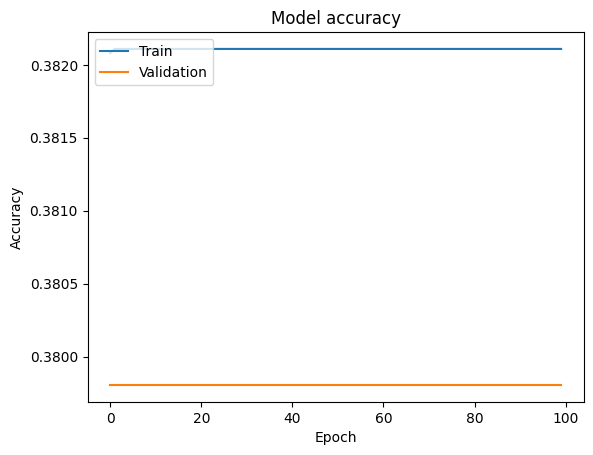

In [9]:
import matplotlib.pyplot as plt

# Plot training history
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


Fine-Tuning for Enhanced Performance

In [10]:
# Adjust the model structure or learning rate
model.compile(optimizer=RMSprop(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Re-fit the model
history = model.fit(X_train, y_train, epochs=50, batch_size=512, validation_split=0.2)


c:\Python38\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/50
698/698 [==============================] - 3s 3ms/step - loss: -11924067328.0000 - accuracy: 0.3821 - val_loss: -11989013504.0000 - val_accuracy: 0.3798
Epoch 2/50
698/698 [==============================] - 2s 3ms/step - loss: -11959841792.0000 - accuracy: 0.3821 - val_loss: -12025040896.0000 - val_accuracy: 0.3798
Epoch 3/50
698/698 [==============================] - 2s 3ms/step - loss: -11995596800.0000 - accuracy: 0.3821 - val_loss: -12060932096.0000 - val_accuracy: 0.3798
Epoch 4/50
698/698 [==============================] - 2s 3ms/step - loss: -12031484928.0000 - accuracy: 0.3821 - val_loss: -12097002496.0000 - val_accuracy: 0.3798
Epoch 5/50
698/698 [==============================] - 2s 3ms/step - loss: -12067400704.0000 - accuracy: 0.3821 - val_loss: -12133136384.0000 - val_accuracy: 0.3798
Epoch 6/50
698/698 [==============================] - 2s 3ms/step - loss: -12103389184.0000 - accuracy: 0.3821 - val_loss: -12169238528.0000 - val_accuracy: 0.3798
Epoch 7/50
698/6

Examining Model's Efficacy

In [11]:
# Re-evaluate the fine-tuned model
fine_tuned_evaluation = model.evaluate(X_test, y_test)

# Compare the evaluations
print(f"Initial Evaluation: {evaluation[1]}")
print(f"Fine-Tuned Evaluation: {fine_tuned_evaluation[1]}")



3489/3489 [==============================] - 5s 1ms/step - loss: -13843469312.0000 - accuracy: 0.3795
Initial Evaluation: 0.37945953011512756
Fine-Tuned Evaluation: 0.37945953011512756
